# Deep Learning - Nasir Hussain - 2021/03/13

# 5 Fundamentals of machine learning

- central problem of machine learning
  - overfitting

## 5.0.1 Four branches of machine learning

- Three specific types of machine-learning problems (supervised learning)
  - binary classification
  - multiclass classification
  - scalar regression

- Four broad categories Machine-learning
  - Supervised learning
  - Unsupervised learning
  - Self-supervised learning
  - Reinforcement learning

### 5.0.1.1 Supervised learning

- Supervised learning
  - map input data to known targets/annotations
  - Categories
    - classification
    - regression
    - Sequence generation
      - Given a picture, predict a caption describing it. Sequence generation can sometimes be reformulated as a series of classification problems (such as repeatedly predicting a word or token in a sequence).
    - Syntax tree prediction
      - Given a sentence, predict its decomposition into a syntax tree
    - Object detection
      - Given a picture, draw a bounding box around certain objects inside the picture. This can also be expressed as a classification problem (given many candidate bounding boxes, classify the contents of each one) or as a joint classification and regression problem, where the bounding-box coordinates are predicted via vector regression.
    - Image segmentation
      - Given a picture, draw a pixel-level mask on a specific object.

### 5.0.1.2 Unsupervised learning

- Unsupervised learning
  - finding interesting transformations of the input data without the help of any targets
  - purposes 
    - data visualization
    - data compression
    - data denoising
    - to better understand the correlations present in the data at hand.
  - Categories
    - Dimensionality reduction
    - clustering

### 5.0.1.3 Self-supervised learning

- Self-supervised learning / temporally supervised learning
  - supervised learning without human-annotated labels
  - supervision comes from future input data
  - labels generated from the input data (heuristic algorithm)
  - Examples
    - autoencoders
      - generated targets are the input, unmodified
    - predict the next frame in a video, given past frames
    - predict the the next word in a text, given previous words

### 5.0.1.4 Reinforcement learning
- an agent receives information about its environment and learns to choose actions that will maximize some reward

### Notes

- Classification and regression glossary
  - Sample or input
    - One data point that goes into your model
  - Prediction or output
    - What comes out of your model.
  - Target
    - The truth. What your model should ideally have predicted, according to an external source of data.
  - Prediction error or loss value
    - A measure of the distance between your model’s prediction and the target.
  - Classes
    - A set of possible labels to choose from in a classification problem.
  - Label
    - A specific instance of a class annotation in a classification problem.
  - Ground-truth or annotations
    - All targets for a dataset, typically collected by humans.
  - Binary classification
    - A classification task where each input sample should be categorized into two exclusive categories.
  - Multiclass classification
    - A classification task where each input sample should be categorized into more than two categories
  - Multilabel classification
    - A classification task where each input sample can be assigned multiple labels.
  - Scalar regression
    - A task where the target is a continuous scalar value.
  - Vector regression
    - A task where the target is a set of continuous values
  - Mini-batch or batch
    - A small set of samples that are processed simultaneously by the model.


## 5.1 Generalization: The goal of machine learning

- split the data into
  - a training set
  - a validation set
  - a test set
- reason not to evaluate the models on the same data
  - after just a few epochs, performance on never-before-seen data started diverging from performance on the training data, which always improves as training progresses.
-  optimization and generalization
  - Optimization
    - process of adjusting a model to get the best performance possible on the training data
  - generalization
    - how well the trained model performs on data it has never seen before. 
  - regularization
    - process of fighting overfitting 
- The goal 
  - good generalization 
    - can’t control generalization
    - can only fit the model to its training data
      - too well
        - overfitting kicks
        - generalization suffers

### 5.1.1 Underfitting and overfitting

![](./snaps/5.1.PNG)

- Training cycle
  - beginning
    - optimization and generalization are correlated
      - the lower the loss on training data, the lower the loss on test data.
    - underfit
  - after some iterations
    - generalization stops improving
    - validation metrics stall and then begin to degrade 
    - the model is starting to overfit
      - beginning to learn patterns that are specific to the training
- Overfitting occur when 
  - data is noisy
  - involves uncertainty
  - includes rare features

#### NOISY TRAINING DATA

  - data is noisy (distortion)
  - targets are mislabeled
    - generalization performance will degrade

#### AMBIGUOUS FEATURES

- problem involves uncertainty and ambiguity
- robust fit can solve this issue

    ![](./snaps/5.2.PNG)

#### RARE FEATURES AND SPURIOUS CORRELATIONS

- rare feature values are highly susceptible to overfitting
- features are wrongly classified in data
- model will learn pattern rather than train

#### MNIST with Noise

- Take MNIST
  - add noise
    - concatenate 784 white noise dimensions to the existing 784 dimensions of the data
      - half of the data is now noise
    - concatenate 784 all-zeros dimensions
  - concatenation of meaningless features does not at all affect the information content of the data

In [1]:
# Listing 5.1 Adding white noise channels or all-zeros channels to MNIST

from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
# Listing 5.2 Training the same model on MNIST data with noise channels or all-zero channels

from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 4ms/step - loss: 0.6190 - accuracy: 0.8106 - val_loss: 0.3124 - val_accuracy: 0.9063
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2522 - accuracy: 0.9230 - val_loss: 0.2369 - val_accuracy: 0.9291
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1618 - accuracy: 0.9500 - val_loss: 0.1429 - val_accuracy: 0.9587
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1164 - accuracy: 0.9640 - val_loss: 0.1374 - val_accuracy: 0.9598
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0852 - accuracy: 0.9733 - val_loss: 0.1402 - val_accuracy: 0.9602
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0632 - accuracy: 0.9798 - val_loss: 0.1243 - val_accuracy: 0.9647
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0479 - accuracy: 0.9845 - val_loss: 0.1382 - val_accuracy: 0.9629
Epoch 

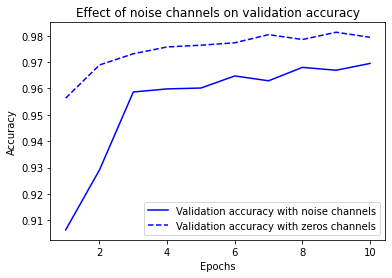

In [3]:
# Listing 5.3 Plotting a validation accuracy comparison
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

- the validation accuracy of the model trained with noise channels ends up about one percentage point lower

- To neglect noisy data
  - feature selection
    - compute some usefulness score for each feature available
    - a measure of how informative the feature is with respect to the task
    - keep features that are above some threshold

### 5.1.2 The nature of generalization in deep learning

- deep learning models can be trained to fit anything
- shuffle the MNIST labels and train a model
- no relationship between the inputs and the shuffled labels
  - the training loss goes down just fine
  - the validation loss does not improve at all over time

In [4]:
# Listing 5.4 Fitting an MNIST model with randomly shuffled labels
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3173 - accuracy: 0.1037 - val_loss: 2.3045 - val_accuracy: 0.1054
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2999 - accuracy: 0.1161 - val_loss: 2.3122 - val_accuracy: 0.0989
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2896 - accuracy: 0.1289 - val_loss: 2.3193 - val_accuracy: 0.0997
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2751 - accuracy: 0.1409 - val_loss: 2.3283 - val_accuracy: 0.0967
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2573 - accuracy: 0.1556 - val_loss: 2.3388 - val_accuracy: 0.1001
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2357 - accuracy: 0.1680 - val_loss: 2.3595 - val_accuracy: 0.0993
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2115 - accuracy: 0.1854 - val_loss: 2.3811 - val_accuracy: 0.0966

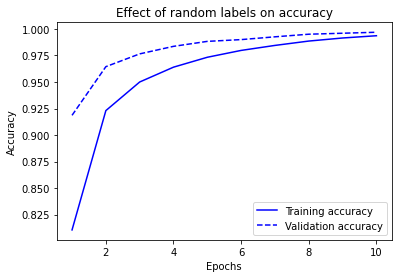

In [5]:
# Plotting a validation and training accuracy comparison
import matplotlib.pyplot as plt
training_accuracy = history_noise.history["accuracy"]
validation_accuracy = history_zeros.history["accuracy"]
epochs = range(1, 11)
plt.plot(epochs, training_accuracy, "b-",
         label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b--",
         label="Validation accuracy")
plt.title("Effect of random labels on accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### THE MANIFOLD HYPOTHESIS

- A “manifold” is a lower-dimensional subspace of some parent space that is locally similar to a linear (Euclidian) space
- manifold hypothesis implies
  - Machine learning models only have to fit following within their potential input space
    - relatively simple
    - low-dimensional
    - highly structured subspaces
  - Within one of these manifolds, it’s always possible to interpolate between two inputs, that is to say,
morph one into another via a continuous path along which all points fall on the manifold.

#### INTERPOLATION AS A SOURCE OF GENERALIZATION

- If data points can be interpolated
  - you can start making sense of points you’ve never seen before by relating them to other points that lie close on the manifold
  - you can make sense of the totality of the space using only a sample of the space
  - use interpolation to fill in the blanks
- Difference between linear interpolation and interpolation on the latent manifold. Every point on the latent manifold of digits is a valid digit, but the average of two digits usually isn’t.

  ![](./snaps/5.3.PNG)

-  learning achieves generalization via interpolation on a learned approximation of the data manifold
- interpolation is not only there for generalization
  - it enables local generalization

#### WHY DEEP LEARNING WORKS

![](./snaps/5.4.PNG)

- a crumbeled paper is a 2d manifold in 3d space
- A deep learning model is a tool for uncrumpling paper balls
- Deep learning model
  - very high-dimensional differentiable curve
    - curve that is smooth and continuous
    - curve is fitted to data points via gradient descent, smoothly and incrementally.
  - deep learning is about taking a big, complex curve, a manifold and incrementally adjusting its parameters until it fits some training data points.

- Going from a random model to an overfit model, and achieving a robust fit as an intermediate state

  ![](./snaps/5.5.PNG)

- properties of deep learning models that make them particularly well-suited to learning latent manifolds
  - Deep learning models implement a smooth, continuous mapping from their inputs to their outputs. It has to be smooth and continuous because it must be differentiable, by necessity.This smoothness helps approximate latent manifolds, which follow the same properties.
  - Deep learning models tend to be structured in a way that mirrors the “shape” of the information in their training data. This is particularly the case for image-processing models and sequence-processing models. More generally, deep neural networks structure their learned representations in a hierarchical and modular way, which echoes the way natural data is organized.


#### TRAINING DATA IS PARAMOUNT

- only be able to generalize if your data forms a manifold where points can be interpolated
-  trained on a dense sampling of its input space
  - training data should densely cover the entirety of the input data manifold 

## 5.2 Evaluating machine learning models

### 5.2 Evaluating machine learning models

- split data into three sets
  - training 
  - validation,
  - test
- hyperparameters are tuned (learning) based on feedback signal
- learning
  - search for a good configuration in some parameter space
-  information leaks
  - information about the validation data leaks into the model
  - can be prevented by doing validations as less as possible
- Little data
  - simple holdout validation
  - K-fold validation
  - iterated K-fold validation with shuffling. 

#### SIMPLE HOLDOUT VALIDATION

![](./snaps/5.6.PNG)

- if little data is available, then your validation and test sets may contain too few samples to be statistically representative of the data at hand

#### K-FOLD VALIDATION

![](./snaps/5.7.PNG)

#### ITERATED K-FOLD VALIDATION WITH SHUFFLING
- apply K-fold validation multiple times, shuffling the data every time before splitting it K ways. 
- The final score is the average of the scores obtained at each run of K-fold validation.

### 5.2.2 Beating a common-sense baseline

- only feedback you have is your validation metrics
- always pick a trivial baseline that you’ll try to beat. 
- baseline could be
    -  the performance of a random classifier
    - the performance of the simplest non-machine learning technique you can imagine.


### 5.2.3 Things to keep in mind about model evaluation
- Data representativeness
    - reshuffle data before split
- The arrow of time
    - for predictions use test set made up of samples from very past
- Redundancy in your data
    - training and testing data should be disjoint